# Sobre o Dataset

O dataset utilizado contém os dados dos preços de casas de Amsterdam, Holanda, e foi obtido no site kaggle.com (https://www.kaggle.com/datasets/thomasnibb/amsterdam-house-price-prediction). Para fazer o algoritmo de Regressão Linear foram usadas as colunas Area (área) e Price (preço), sendo Price variando em função de Area.

In [20]:
import pandas as pd
import random as rand
import seaborn as sns
from matplotlib import pyplot as plt

# Importação e visualização geral do dataset
df = pd.read_csv('dados/house-price.csv', index_col=None)
display(df)


,Address,Zip,Price,Area,Room,Lon,Lat
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...
915,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
916,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
917,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
918,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


In [21]:
# Informações sobre os tipos de dados e colunas
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Address  920 non-null    object 
 1   Zip      920 non-null    object 
 2   Price    920 non-null    float64
 3   Area     920 non-null    int64  
 4   Room     920 non-null    int64  
 5   Lon      920 non-null    float64
 6   Lat      920 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 50.4+ KB


None

A plotagem dos gráficos abaixo nos mostra o comportamento da distribuição dos dados quando fazemos uma coluna em função da outra. Podemos perceber o comportamento de crescimento linear do preço dos imóveis em função da área, assim como a área em função do preço. 

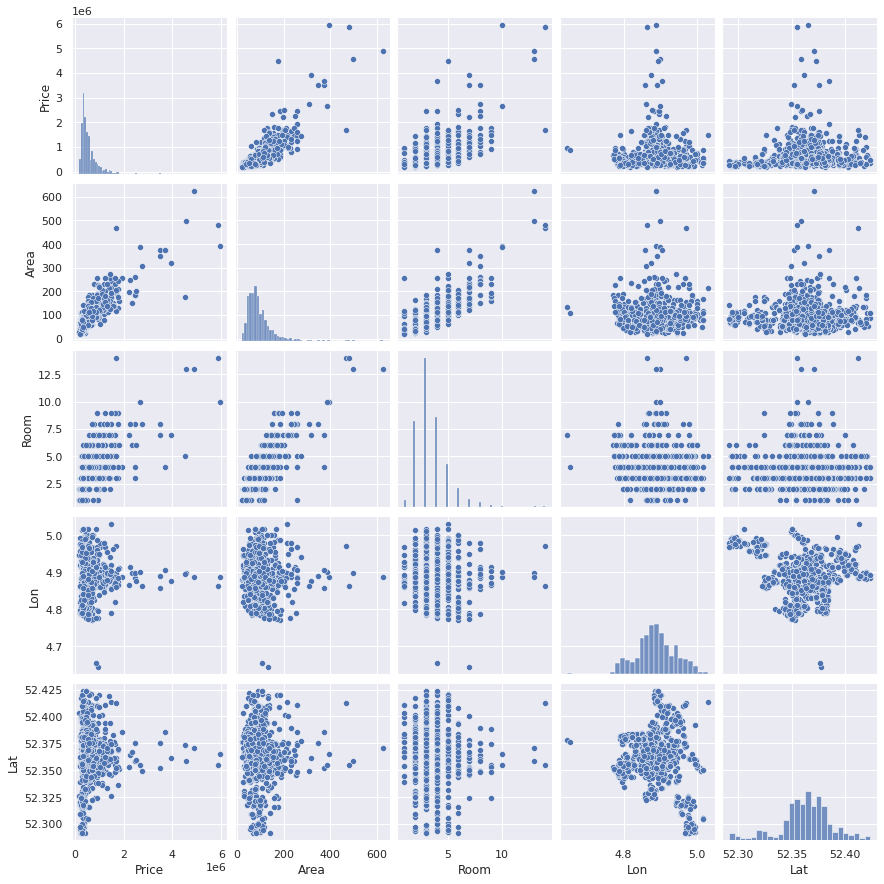

In [22]:
# Plotagem dos gráficos das colunas pareadas
sns.set(rc={'figure.facecolor':(0,0,0,0)})
sns.pairplot(df)


# Regressão Linear

Este bloco de código é responsável por calcular os valores da reta de regressão linear Xw + b. Cada época contém um número N de iterações, tal que N é o tamanho do conjunto de dados de treino. Cada iteração calcula a predição de acordo com os valores do w (peso) e b (bias) naquele momento, e em seguida é calculado o erro em relação ao dado real. Por fim, é calculado o gradiente e a atualização dos valores de w e b. A cada iteração também é armazenado o valor do erro quadrático obtido naquele momento para fazer a plotagem do seu gráfico .

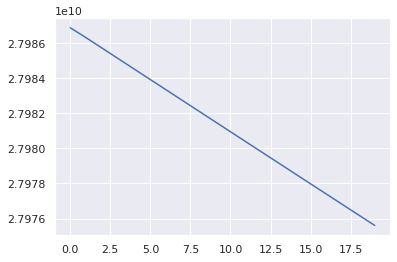

In [23]:
# Separação do dataset para os dados de treino
X_train = df['Area'][:500]
y_train = df['Price'][:500]


# Learning Rate
lr = 0.001
# Weight
w = rand.random()
# Bias
b = 0
# MSE (Cost Function)
mse = []
N = len(X_train)


# 20 épocas
for i in range(20):
    for j in range(N):
        # Predição do modelo
        pred = (X_train[j] * w) + b
        # Erro calculado
        error = pred - y_train[j]

        # Calculos das derivadas
        dw  = (1 / N) * X_train[j] * error
        db = (1 / N) * error

        # Atualização dos parâmetros
        w = w - lr * dw
        b = b - lr * db
    # Lista para fazer o gráfico da função de custo
    mse.append(error ** 2)


# Gráfico do erro quadrático
plt.plot(mse)
plt.show()

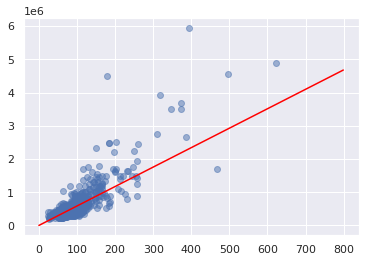

In [24]:
# Gráfico da reta de regressão
regression_line = [(x * w + b) for x in range(800)]

plt.scatter(x=X_train, y=y_train,  alpha=0.5)
plt.plot(regression_line, color='red')
plt.show()

# Teste de input

In [25]:
area = int(input('Digite a área: '))
print('Preço estimado para {} m²: {:.2f} €'.format(area, float(area * w + b)))

Preço estimado para 89 m²: 520521.84 €
